# Meta Llama 3.3 70B Instruct with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.3 70B Instruct with prompt from 2/26/25 v2.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v226_v2
MODEL_ID = "us.meta.llama3-3-70b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v226_v2

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:root:Completed: 2
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 11
INFO:root:Completed: 12
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 16
INFO:root:Completed: 18
INFO:root:Completed

CPU times: user 1min 4s, sys: 4.59 s, total: 1min 9s
Wall time: 9min 45s


[{'0003.91306_cites_87633.txt': {'model': 'us.meta.llama3-3-70b-instruct-v1:0',
   'input_tokens': 3380,
   'output_tokens': 130,
   'prediction': 'no',
   'confidence': 0.92,
   'rationale': "The Acting Case references and reapplies the rules established in the Target Case, specifically the rules regarding the purchaser of coupon bonds, without any indication of reversal or undermining of the Target Case's holdings. The discussion is about the application of these rules to a specific scenario rather than challenging the principles set forth in Murray v. Lardner.",
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Murray v. Lardner',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Murray v. Lardner",\n  "overruled": "no",\n  "confidence": 0.92,\n  "rationale": "The Acting Case references and reapplies the rules established in the Target Case, specifica

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3380.0,130.0,no,0.92,The Acting Case references and reapplies the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
1,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4837.0,121.0,no,0.92,The Acting Case discusses and references the T...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."
2,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4924.0,139.0,no,0.92,The Acting Case does not explicitly or implici...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
3,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4303.0,173.0,no,0.92,"The Acting Case, Morgan v. United States, disc...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
4,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5774.0,179.0,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/2.llama/3.llama33_70B_v226_v2_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

7

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/2.llama/3.llama33_70B_v226_v2_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

5

In [10]:
retry = prediction_df[prediction_df["prediction"].isna()]
retry_filenames = retry["filename"].to_list()
retry = df[df["filename"].isin(retry_filenames)]
len(retry)

5

In [11]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 1074
INFO:root:Completed: 1036
INFO:root:Completed: 1069
INFO:root:Completed: 1071
INFO:root:Completed: 1070


CPU times: user 630 ms, sys: 32.6 ms, total: 662 ms
Wall time: 3.57 s


[{'1075.118273_cites_111516.txt': {'model': 'us.meta.llama3-3-70b-instruct-v1:0',
   'input_tokens': 4728,
   'output_tokens': 154,
   'prediction': 'no',
   'confidence': 0.92,
   'rationale': "The Acting Case cites the Target Case, but does not explicitly or implicitly overrule it. The Target Case is referenced to explain a point of law or to provide context, but the Acting Case does not take any Negative Actions against the Target Case. The Acting Case's conclusion regarding the Mille Lacs Band's usufructuary privileges is based on its own analysis and does not depend on overruling the Target Case.",
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Oregon Department of Fish & Wildlife v. Klamath Indian Tribe',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Oregon Department of Fish & Wildlife v. Klamath Indian Tribe",\n  "overruled": "no",\n  "con

In [12]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,1075.118273_cites_111516.txt,us.meta.llama3-3-70b-instruct-v1:0,4728,154,no,0.92,"The Acting Case cites the Target Case, but doe...",Determine whether the Acting Case overruled th...,Oregon Department of Fish & Wildlife v. Klamat...,"```json\n{\n ""instructions"": ""Determine wheth..."
1,1037.118155_cites_110331.txt,us.meta.llama3-3-70b-instruct-v1:0,8568,164,no,0.99,The Acting Case does not explicitly or implici...,Determine whether the Acting Case overruled th...,United States v. Ward (1980),"```json\n{\n ""instructions"": ""Determine wheth..."
2,1070.118386_cites_117967.txt,us.meta.llama3-3-70b-instruct-v1:0,10003,137,no,0.95,"The Acting Case, Mitchell v. Helms, does not m...",Determine whether the Acting Case overruled th...,Rosenberger v. Rector & Visitors of University...,"```json\n{\n ""instructions"": ""Determine wheth..."
3,1072.118428_cites_103214.txt,us.meta.llama3-3-70b-instruct-v1:0,7716,163,no,1.00,"The Acting Case, United States v. Hatter, did ...",Determine whether the Acting Case overruled th...,O'Malley v. Woodrough,"```json\n{\n ""instructions"": ""Determine wheth..."
4,1071.118428_cites_99610.txt,us.meta.llama3-3-70b-instruct-v1:0,11196,147,yes,0.99,The Acting Case explicitly states that it over...,Determine whether the Acting Case overruled th...,Evans v. Gore,"```json\n{\n ""instructions"": ""Determine wheth..."


In [13]:
retry_df["prediction"].isna().sum()

0

In [14]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [15]:
prediction_df = comb_prediction_df

In [16]:
prediction_df["prediction"].isna().sum()

0

In [17]:
prediction_df.to_csv("predictions/2.llama/3.llama33_70B_v226_v2_prompt.csv", index=False)

In [18]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [19]:
assert len(df) == len(prediction_df)

In [20]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5774.0,179.0,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4303.0,173.0,no,0.92,"The Acting Case, Morgan v. United States, disc...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3380.0,130.0,no,0.92,The Acting Case references and reapplies the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4924.0,139.0,no,0.92,The Acting Case does not explicitly or implici...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4837.0,121.0,no,0.92,The Acting Case discusses and references the T...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


# Run evaluation

In [21]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [22]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [23]:
eval_df["prediction"].value_counts()

prediction
no     873
yes    211
Name: count, dtype: int64

In [24]:
eval_df["input_tokens"].sum()

6047638.0

In [25]:
eval_df["output_tokens"].sum()

166803.0

In [26]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [27]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.92      0.95       935
         Yes       0.63      0.89      0.74       149

    accuracy                           0.91      1084
   macro avg       0.81      0.90      0.84      1084
weighted avg       0.93      0.91      0.92      1084



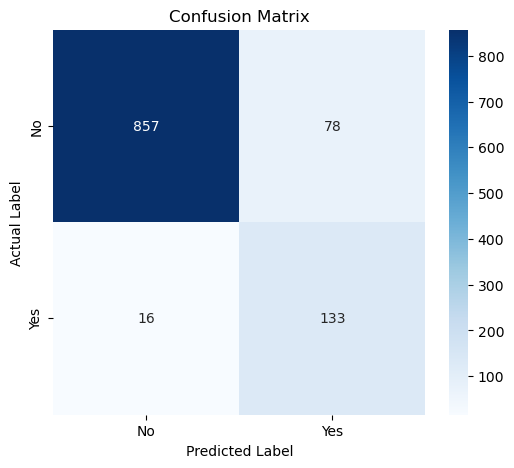

In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.91
Precision: 0.63
Recall: 0.89
F-score: 0.74
Specificity: 0.92
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 133
True negatives: 857
False positives: 78
False negatives: 16


In [30]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

78

In [31]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

16

# Save the evaluation df

In [32]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,us.meta.llama3-3-70b-instruct-v1:0,5774.0,179.0,yes,0.92,"The Acting Case, Morgan v. United States, expl...",Determine whether the Acting Case overruled th...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,us.meta.llama3-3-70b-instruct-v1:0,4303.0,173.0,no,0.92,"The Acting Case, Morgan v. United States, disc...",Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,us.meta.llama3-3-70b-instruct-v1:0,3380.0,130.0,no,0.92,The Acting Case references and reapplies the r...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,us.meta.llama3-3-70b-instruct-v1:0,4924.0,139.0,no,0.92,The Acting Case does not explicitly or implici...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,us.meta.llama3-3-70b-instruct-v1:0,4837.0,121.0,no,0.92,The Acting Case discusses and references the T...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth..."


In [33]:
eval_df.to_csv("predictions/2.llama/3.llama33_70B_v226_v2_prompt_eval.csv", index=False)